<center>
#Naiwny klasyfikator bayesowski
</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [31]:
# import numpy as np
import pandas as pd 
# import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split



Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [32]:

df = pd.read_csv('data.csv')


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [33]:
categorical = df.select_dtypes("object").columns.tolist()

print('Dane tektowe zawierają kolumny :\n\n', categorical)


Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [34]:
for column in categorical:
    print(f"\nWartości w {column}: \n{df[column].unique()}")

for column in categorical:
    df[column].replace('?', np.NaN, inplace=True)


Wartości w workclass: 
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Wartości w education: 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Wartości w marital_status: 
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Wartości w occupation: 
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

Wartości w relationship: 
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Wartości w race: 
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

W

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [35]:
X = df.drop(['income'], axis='columns')
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [36]:
import category_encoders as ce

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

Accuracy:  0.7974204115057836
True negative:  7041
False positive:  366
False negative:  1613
True positive:  749


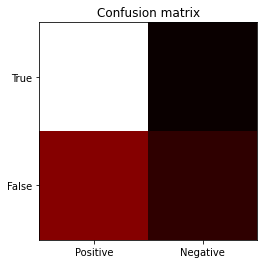

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = conf_mat.ravel()
print("Accuracy: ", accuracy_score(y_test,y_pred,normalize=True))
print("True negative: ", tn)
print("False positive: ", fp)
print("False negative: ", fn)
print("True positive: ", tp)
plt.imshow(conf_mat, cmap='hot')
plt.xticks((0,1),['Positive','Negative'])
plt.yticks((0,1),['True','False'])
plt.title('Confusion matrix')
plt.show()

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

In [38]:
X = df[['race', 'native_country']]
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

Accuracy:  0.2910226225816358
True negative:  534
False positive:  6873
False negative:  53
True positive:  2309


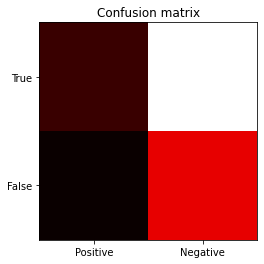

In [40]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = conf_mat.ravel()
print("Accuracy: ", accuracy_score(y_test,y_pred,normalize=True))
print("True negative: ", tn)
print("False positive: ", fp)
print("False negative: ", fn)
print("True positive: ", tp)
plt.imshow(conf_mat, cmap='hot')
plt.xticks((0,1),['Positive','Negative'])
plt.yticks((0,1),['True','False'])
plt.title('Confusion matrix')
plt.show()

## Wnioski
- przy pierwszej predykcji korzystając ze wszystkich możliwych zmiennych uzyskaliśmy bardzo dobrą jakość dopasowania
- predykcja z mniejszą liczbą zmiennych w klasyfikatorze Bayesowskim działa gorzej, bo zostały wybrane mniej reprezentatywne zmienne
- macierz pomyłek jednoznacznie wskazuje na to, że przy zastosowaniu zbyt małej liczbie rekordów w zbiorze treningowym znacznie ucierpi jakość dopasowania